In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import numpy as np
import timeit

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
records = pd.read_csv('/content/drive/MyDrive/Journey Optimisation (1).csv')

In [ ]:
missing_values_per_column = records.isnull().sum()
print(missing_values_per_column)

Contact_Event_Key           0
Deakin_SupporterID          0
JobNumber                   0
Activity_Code               0
Activity_Name               0
Event_Date                  0
Phase_Name                  0
OutcomeCardReceived         0
Helix_Community        115565
Helix_Persona          115565
PrimarySegment              0
TotalPaid              710971
dtype: int64


In [ ]:
records['Helix_Community'].fillna('unknown', inplace=True)
records['Helix_Persona'].fillna('unknown', inplace=True)
records.dropna(subset=['TotalPaid'], inplace=True)

In [ ]:
issing_values_per_column = records.isnull().sum()
print(issing_values_per_column)

Contact_Event_Key      0
Deakin_SupporterID     0
JobNumber              0
Activity_Code          0
Activity_Name          0
Event_Date             0
Phase_Name             0
OutcomeCardReceived    0
Helix_Community        0
Helix_Persona          0
PrimarySegment         0
TotalPaid              0
dtype: int64


In [ ]:
for i in records.iloc[:,0:]:
  miss=records[i].isna().sum()
  print(i,'missing: ', miss)
  print(records.isnull().sum().sort_values(ascending=0)) # this line and the following lines should have the same indentation as the line above
  records.dropna(subset=['TotalPaid'], inplace=True)
  records['Stream'].fillna(records['Stream'].mode()[0], inplace=True)
  records['Helix_Community'].fillna('unknown', inplace=True)
  records['Helix_Persona'].fillna('unknown', inplace=True)

Deakin_SupporterID missing:  0
TotalPaid              710971
Helix_Community        115565
Helix_Persona          115565
Stream                    195
Deakin_SupporterID          0
Contact_Event_Key           0
JobNumber                   0
Activity_Code               0
Activity_Name               0
Event_Date                  0
OutcomeCardReceived         0
PrimarySegment              0
Phase                       0
dtype: int64
Contact_Event_Key missing:  0
Deakin_SupporterID     0
Contact_Event_Key      0
JobNumber              0
Activity_Code          0
Activity_Name          0
Event_Date             0
OutcomeCardReceived    0
TotalPaid              0
Helix_Community        0
Helix_Persona          0
PrimarySegment         0
Phase                  0
Stream                 0
dtype: int64
JobNumber missing:  0
Deakin_SupporterID     0
Contact_Event_Key      0
JobNumber              0
Activity_Code          0
Activity_Name          0
Event_Date             0
OutcomeCardReceived    0
T

In [ ]:
records.dtypes

,0
Contact_Event_Key,int64
Deakin_SupporterID,int64
JobNumber,object
Activity_Code,int64
Activity_Name,object
Event_Date,object
Phase_Name,object
OutcomeCardReceived,int64
Helix_Community,object
Helix_Persona,object


In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
records['response'] = records['TotalPaid'].apply(lambda x: 0 if x == 0 else 1)

# To check the new column
print(records[['TotalPaid', 'response']].head())

    TotalPaid  response
0        10.0         1
6        20.0         1
9        10.0         1
10       60.0         1
15       10.0         1


In [ ]:
records.head()

,Contact_Event_Key,Deakin_SupporterID,JobNumber,Activity_Code,Activity_Name,Event_Date,Phase_Name,OutcomeCardReceived,Helix_Community,Helix_Persona,PrimarySegment,TotalPaid,response
0,219615402,138684,K1436,8879,BB Education Aug FY21,2021-09-01T10:00:15,Online Main,0,200 Metrotechs,206 Fit and Fab,General Population,10.0,1
6,214795545,120208,K1418,8785,BB Christmas Oct FY21,2020-11-05T01:00:00,Online eDM2,0,400 Hearth and Home,401 Home Improvers,General Population,20.0,1
9,214812064,116786,K1418,8785,BB Christmas Oct FY21,2020-11-05T01:00:00,Online eDM2,1,200 Metrotechs,207 Seasoned Lifestylers,General Population,10.0,1
10,214812900,117799,K1418,8785,BB Christmas Oct FY21,2020-11-05T01:00:00,Online eDM2,1,400 Hearth and Home,407 House Proud,General Population,60.0,1
15,214782804,133130,K1418,8785,BB Christmas Oct FY21,2020-11-05T01:00:00,Online eDM2,0,100 Leading Lifestyles,103 Social Progressives,General Population,10.0,1


In [ ]:
# Put all the column labels you want to drop into a list.
records.drop(['Contact_Event_Key','JobNumber','Activity_Name','Event_Date','TotalPaid'], axis=1, inplace=True)

In [ ]:
!pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'records' is your DataFrame

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over all columns in the DataFrame
for col in records.columns:
    # Check if the column is of object type (categorical)
    if records[col].dtype == 'object':
        # Fit and transform the column using LabelEncoder
        records[col] = le.fit_transform(records[col])

# Print the DataFrame with encoded columns
print(records.head())

    Deakin_SupporterID  Activity_Code  Phase_Name  OutcomeCardReceived  \
0               138684           8879           4                    0   
6               120208           8785           5                    0   
9               116786           8785           5                    1   
10              117799           8785           5                    1   
15              133130           8785           5                    0   

    Helix_Community  Helix_Persona  PrimarySegment  response  
0                 1             20               3         1  
6                 3             32               3         1  
9                 1             21               3         1  
10                3             38               3         1  
15                0              2               3         1  


In [ ]:
X = records.drop('response', axis=1)
y = records['response']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Initial split: 70% training, 30% temporary (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the temporary set into validation (50% of 30% = 15% of the total) and test (15% of the total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features using the training data statistics
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# You now have X_train, X_val, X_test, y_train, y_val, and y_test

In [ ]:
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
# Set the desired parameters directly
classifier = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5, random_state=17)
classifier.fit(X_train, y_train)

pred_y = classifier.predict(X_val)



results = confusion_matrix(y_val, pred_y)
error = zero_one_loss(y_val, pred_y)

# Calculate and print metrics
accuracy_score = metrics.accuracy_score(y_val, pred_y)
precision = metrics.precision_score(y_val, pred_y, average='weighted') # Assuming weighted average for multi-class
recall = metrics.recall_score(y_val, pred_y, average='weighted') # Assuming weighted average for multi-class
f1_score = metrics.f1_score(y_val, pred_y, average='weighted') # Assuming weighted average for multi-class
eport = classification_report(y_val, pred_y)
# For FPR, you'll need to decide how to handle multi-class
# Here's one way using label binarization:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_val, classes=range(5))
pred_y_bin = label_binarize(pred_y, classes=range(5))
kappa = cohen_kappa_score(y_val, pred_y)
print("Kappa:", kappa)

print(results)
print(classification_report(y_val, pred_y))
print("error:",error)
print("Accuracy Score:", accuracy_score)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
y_testing_pred = classifier.predict(X_test)
print("Test Set Results")
print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_testing_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_testing_pred))
kappa1 = cohen_kappa_score(y_test, y_testing_pred)
print("Kappa:", kappa1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:697: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Kappa: nan
[[177782]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00    177782

    accuracy                           1.00    177782
   macro avg       1.00      1.00      1.00    177782
weighted avg       1.00      1.00      1.00    177782

error: 0.0
Accuracy Score: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Test Set Results
Confusion Matrix (Test):
 [[177782]]

Classification Report (Test):
               precision    recall  f1-score   support

           1       1.00      1.00      1.00    177782

    accuracy                           1.00    177782
   macro avg       1.00      1.00      1.00    177782
weighted avg       1.00      1.00      1.00    177782

Kappa: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:697: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score # Import accuracy_score
gnb = GaussianNB(priors=None, var_smoothing=1e-9)
gnb.fit(X_train, y_train)
gnb_pred_y =gnb.predict(X_val)
error = zero_one_loss(y_val, gnb_pred_y)
gnbresults = confusion_matrix(y_val, gnb_pred_y)

# Calculate and print metrics
accuracy_score = metrics.accuracy_score(y_val, gnb_pred_y)
precision = metrics.precision_score(y_val, gnb_pred_y, average='weighted') # Assuming weighted average for multi-class
recall = metrics.recall_score(y_val, gnb_pred_y, average='weighted') # Assuming weighted average for multi-class
f1_score = metrics.f1_score(y_val, gnb_pred_y, average='weighted') # Assuming weighted average for multi-class
kappa = cohen_kappa_score(y_val, gnb_pred_y)
print("Kappa:", kappa)


print(gnbresults)
print("error:",error)
print("Accuracy Score:", accuracy_score)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Kappa: 0.6267065520420283
[[92392 21955]
 [ 9805 53630]]
error: 0.17864575716326736
Accuracy Score: 0.8213542428367326
Precision: 0.8346485315920008
Recall: 0.8213542428367326
F1 Score: 0.8241490491932281


In [ ]:
from sklearn.ensemble import RandomForestClassifier # Use RandomForestClassifier for classification

rf = RandomForestClassifier(n_estimators=20, random_state=0) # Change variable name to reflect the change in model type
rf.fit(X_train, y_train)
rf_pred_y = rf.predict(X_val)
error = zero_one_loss(y_val, rf_pred_y)
rfresults = confusion_matrix(y_val, rf_pred_y)

# Calculate and print metrics
accuracy_score = metrics.accuracy_score(y_val, rf_pred_y)
precision = metrics.precision_score(y_val, rf_pred_y, average='weighted') # Assuming weighted average for multi-class
recall = metrics.recall_score(y_val, rf_pred_y, average='weighted') # Assuming weighted average for multi-class
f1_score = metrics.f1_score(y_val, rf_pred_y, average='weighted') # Assuming weighted average for multi-class
kappa = cohen_kappa_score(y_val, rf_pred_y)
print("Kappa:", kappa)
# For FPR, you'll need to decide how to handle multi-class
# Here's one way using label binarization:


print(rfresults)
print("error:",error)
print("Accuracy Score:", accuracy_score)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Kappa: 0.5852905469189804
[[97887 16460]
 [17283 46152]]
error: 0.1897998672531528
Accuracy Score: 0.8102001327468472
Precision: 0.8096778415556503
Recall: 0.8102001327468472
F1 Score: 0.8099207929450319


In [ ]:
#Calculate start time
start = timeit.default_timer()
#Create a LG Classifier
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()



#Train the model using the training sets y_pred=clf.predict(X_test)
lr.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start
#Calculate start time
start = timeit.default_timer()

# Predict the model
lg_pred_y =lr.predict(X_val)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start
print(confusion_matrix(y_val,lg_pred_y))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_val, lg_pred_y))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_val, lg_pred_y))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_val, lg_pred_y))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_val, lg_pred_y))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_val, lg_pred_y))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_val, lg_pred_y))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_val, lg_pred_y))

#Train time
print('Train Time(s): ',train_time)

#Test time
print('Test Time(s): ',test_time)

[[96096 18251]
 [10615 52820]]
Accuracy: 0.8376326062256021
Precision: 0.7432004615103207
Recall: 0.832663356191377
F1 Score: 0.7853924731982217
Mean Absolute Error: 0.16236739377439785
Cohens kappa: 0.6554869586943247
ROC AUC: 0.836526348703575
Train Time(s):  1.0606319830000075
Test Time(s):  0.003831257000001642


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 20), max_iter=20, solver='adam', random_state=1)

# Train the model
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_val)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix:
 [[95004 19343]
 [ 7416 56019]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88    114347
           1       0.74      0.88      0.81     63435

    accuracy                           0.85    177782
   macro avg       0.84      0.86      0.84    177782
weighted avg       0.86      0.85      0.85    177782



In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))




kappa = cohen_kappa_score(y_val, y_pred)
print("Kappa:", kappa)

Accuracy: 0.8494841997502559
Kappa: 0.6852499151857934


In [ ]:
y_test_pred = mlp.predict(X_test)
print("Test Set Results")
print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

Test Set Results
Confusion Matrix (Test):
 [[94976 19204]
 [ 7486 56116]]

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.93      0.83      0.88    114180
           1       0.75      0.88      0.81     63602

    accuracy                           0.85    177782
   macro avg       0.84      0.86      0.84    177782
weighted avg       0.86      0.85      0.85    177782



In [ ]:
record = records[['Helix_Community','Activity_Code','PrimarySegment','Helix_Persona','Phase','response']]


In [ ]:
le = LabelEncoder()

# Iterate over all columns in the DataFrame
for col in record.columns:
    # Check if the column is of object type (categorical)
    if record[col].dtype == 'object':
        # Fit and transform the column using LabelEncoder
        record[col] = le.fit_transform(record[col])

# Print the DataFrame with encoded columns
print(record.head())

    Helix_Community  Activity_Code  PrimarySegment  Helix_Persona  Phase  \
0                 1           8879               3             20      4   
6                 3           8785               3             32      5   
9                 1           8785               3             21      5   
10                3           8785               3             38      5   
15                0           8785               3              2      5   

    response  
0          1  
6          1  
9          1  
10         1  
15         1  


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
record_scaled = scaler.fit_transform(record)
from sklearn.metrics import davies_bouldin_score # import the function

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)  # Assuming 2 clusters: online and offline
record['stream_cluster'] = kmeans.fit_predict(record_scaled)

# Map clusters to stream types (you can adjust this based on the cluster centroids or characteristics)
record['stream_allocation'] = record['stream_cluster'].map({0: 'online', 1: 'offline'})

# View the stream allocation
print(record[['stream_cluster', 'stream_allocation']].head())
score = davies_bouldin_score(record_scaled, record['stream_cluster'])
print(f"Davies-Bouldin Index: {score}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-23-2373b1d2b328>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  record['stream_cluster'] = kmeans.fit_predict(record_scaled)
<ipython-input-23-2373b1d2b328>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  record['stream_al

    stream_cluster stream_allocation
0                0            online
6                1           offline
9                0            online
10               1           offline
15               0            online
Davies-Bouldin Index: 1.3646236006032328


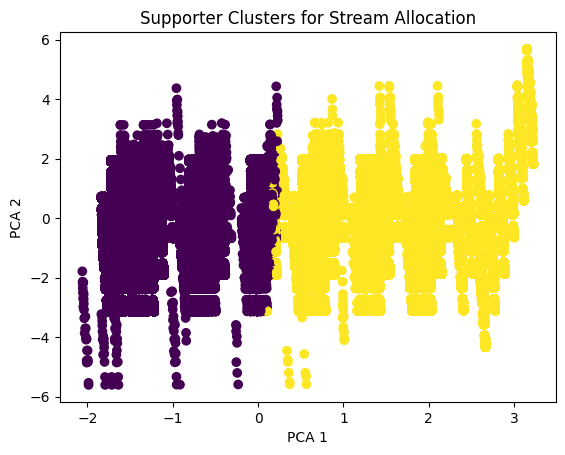

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
pca_result = pca.fit_transform(record_scaled)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=record['stream_cluster'], cmap='viridis')
plt.title('Supporter Clusters for Stream Allocation')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()